In [60]:
import numpy as np
#This brings in a tool called numpy that helps us with mathematical calculations involved in this work yo gave us


# Step 1: Initialize the network with random weights and biases
# Two inputs (input layer), three neurons in the hidden layer, and one neuron in the output layer
#W1 (Weights for Input to Hidden Layer): A table (matrix) of numbers that connects the input layer to the hidden layer.
#We Shape: 3 rows and 2 columns, because we have 2 inputs and 3 neurons in the hidden layer.
#Each number tells us how much to multiply the input by before sending it to the hidden layer.


# Random weights for input to hidden layer (2 inputs -> 3 neurons)
W1 = np.array([[0.1, 0.2],
               [0.3, 0.4],
               [0.5, 0.6]])

#The number 0.1 means we multiply the first input by 0.1 before sending it to the first neuron in the hidden layer.


# Biases for hidden layer (3 neurons)
b1 = np.array([[0.1], [0.1], [0.1]])
#This is a column of numbers added to the results of the input layer before applying the activation function.
#Shaped as: 3 rows and 1 column, because we have 3 neurons in the hidden layer.
#This step will enable the network make better guesses by shifting the activation function which I will explain later.
#The number 0.1 is added to the result of the input layer before applying the ReLU function.


# Random weights for hidden to output layer (3 neurons -> 1 output)
#W2 is a table (matrix) of numbers that connects the hidden layer to the output layer.

W2 = np.array([[0.7, 0.8, 0.9]])

#Each number tells us how much to multiply the hidden layer’s output by before sending it to the output layer.
#Like 0.7 means that the code will multiply the first neuron output by 0.7 before sending it to the output layer
#0.8 means the code will multiply the second neuron in the hidden layer before adding it to the output layer and
#So the same is repeated for 0.9 except it is for the third neuron in the hidden layer in the hidden layer contributing to the final ouput


# Bias for output layer (1 output)

b2 = np.array([[0.1]])

#b2 is a single number added to the result of the hidden layer before applying the activation function.
#it is shaped as 1 row and 1 column because there is 1 output
#0.1 is the bias for the output layer
#it helps the network make better guesses by shifting the activation function
#The sigmound function enables the number to be between 0 and 1 (normalization)
#The formula of the sigmound function is 1/(1+np.exp(hidden layers output + 0.1))


# Input features and target output

X = np.array([[0.5], [0.8]])  # Input features (2 inputs)
Y = np.array([[1]])            # Target output (binary classification)

# X is a table (matrix) that holds the input values for the network.
#Shaped with 2 rows and 1 column because there are 2 input features.
#The numbers 0.5 and 0.8 are the actual input values.
#These are the values that the network will use to make a prediction.
#Imagine we had two pieces of data about UCU's main campus land area, like its length and width.
#These numbers (0.5 and 0.8) represent those measurements.

#ON THE OTHER HAND,

#Y is a table (matrix) that holds the target value, which is what we want the network to predict.
#Shaped with 1 row and 1 column because we have 1 target output.
#The number 1 is the actual target value.
#This is the correct answer that the network is trying to learn to predict.
#If we are trying to classify whether UCU main campus offers the law course or not,
#1 might mean “yes, it’s offer the law course,” and 0 might mean “no, it does not offer the law course.”


# Learning rate
learning_rate = 0.1


#The learning rate is a number that controls how much we adjust the weights and biases during training.
#It helps the network learn by making small adjustments to improve its predictions.
#0.1 learning rate means that the weights and biases are adjusted by 10 percent of the calculated change each time an update is made
#Lets a robot is being trained to deliver food from the UCU Bishop Tucker building to the multiple places around UCU,
#every time we train the robot to move through the multiple pathways of UCU from the two points it is walking from and to, it will make small adjustments to its route pathways every time it is prompted during training so that it is more efficient
#The reason why a smaller training rate is advised is so that the route of the robot does not diverge so much that it ends up walking to Basketball court - fence border instead of say closer like the grass compound just infront of the library assuming it was prompted to walk from the Bishop Tucker building to the library.
#So the recommended adjustments (0.01 to 0.1) help to avoid big fluctuations. Too high adjustments include 1.0 and above and too low adjustments include 0.0001 and below.



# Step 2: Forward pass (making a guess)

# Function for ReLU (activation function for hidden layer)
def relu(Z):
    return np.maximum(0, Z)

#a function named relu that takes one input, Z is defined.
#np.maximum(0, Z): This line uses a function from numpy to compare each element in Z with 0.
#It returns the maximum value between 0 and each element in Z.
#If an element in Z is less than 0, it becomes 0. If it is more than 1, it becomes 1


# Function for Sigmoid (activation function for output layer)
def sigmoid(Z):
    return 1 / (1 + np.exp(-Z))
#this was explained earlier


# Forward pass for the hidden layer
Z1 = np.dot(W1, X) + b1  # Z1 = W1 * X + b1
#np.dot(W1, X) performs a matrix multiplication between the weights W1 and the input features X.
#b1 adds the bias b1 to the result of the matrix multiplication.
#Helps to combine the input features with the weights and biases, preparing them for the activation function.


A1 = relu(Z1)            # A1 is the activation of hidden layer
#This line applies the ReLU activation function to Z1.
#Introduces non-linearity into the model, allowing it to learn more complex patterns.
#It works by making any negative values in Z1 become set to 0, and positive values remain unchanged.
#My own understanding is that nonlinerarity helps the model get complex interactions in the neural network system
#for example, lets say you want to get the distance relationship between the USA and Namibia,
#Introdcuing non-linerity into the model helps the model get curve distance in the Atlantic ocean that turns to Namibia assuming you move downwards via the west coast of the USA heading to Namibia
#If you do not introduce non-linearity, the model will move downwards from the west coast but fail to evaluate the turn needed to the east because of the curvature of the earth and end up in Antartica instead and round back to some where around where it started not necessarily the exact point because the earth is not a perfect sphere.


# Forward pass for the output layer
Z2 = np.dot(W2, A1) + b2  # Z2 = W2 * A1 + b2
A2 = sigmoid(Z2)          # A2 is the predicted output (sigmoid squishes it between 0 and 1)

#np.dot(W2, A1) performs a matrix multiplication between the weights W2 and the activations from the hidden layer A1.
#+b2 adds the bias b2 to the result of the matrix multiplication.
#this aids adding the outputs from the hidden layer with the weights and biases and preparing them for the activation function.


# Step 3: Calculate the binary cross-entropy loss
loss = - (Y * np.log(A2) + (1 - Y) * np.log(1 - A2))

#:calculates the binary cross-entropy loss, which measures how well the predicted output A2 matches the target output Y explained earlier.
#Y * np.log(A2) calculates the loss for the positive class when Y is 1.
#(1 - Y) * np.log(1 - A2) calculates the loss for the negative class (when Y is 0).
#The negative sign ensures that the loss is a positive value, as the logarithm of a number between 0 and 1 is negative.
#For example if the algorithm number outputed is -0.25, the negative sign is lost
#The loss(mistake) is turned into a positive which is easier to process forward.


loss = np.squeeze(loss)  # remove extra dimensions to get a scalar
print(f"Loss: {loss}")
#np.squeeze(loss): Converts the loss from an array to a single number.
#print function prints the loss value. This value can tell how well the model is doing
#A lower loss means that the model is predicting closer to actual target values which is good
#A higher loss value means that the model's predictions are further from the actual target values so there is need to improve
#An accurate Y output of 1 and and A2 output of 0.8, it means there is a loss of 0.2 which is not so high but there is room for fine tunning to improve further.
#My research found that a high or low loss is subjective. The context of the dataset matters.
#But for most cases a loss rate of of 1.5 and above is too high and a loss rate below 0.2 is good
#We can then visualize the loss function to see how close the predicted values are to the actual values.

#Note: If the epoch curve is decreasing, it means the model is doing well
#if the epoch curve decreases and then suddenly shows an increase, it means the data is model is overfitted
#if the epoch curve is increasing, it means the model is not doing well meaning the predicted values are far off from the actual values.



Loss: 0.1977944705965963


In [ ]:

# Step 4: Backward pass (fixing the mistakes)

# Output layer error and gradient
dZ2 = A2 - Y                     # Gradient of loss w.r.t Z2 #:Already explained this line earlier
dW2 = np.dot(dZ2, A1.T)          # Gradient of loss w.r.t W2
db2 = dZ2                        # Gradient of loss w.r.t b2


# Backpropagate through ReLU in the hidden layer
dA1 = np.dot(W2.T, dZ2)          # Error backpropagated to A1
#This computes the gradient of the loss with respect to the activations of the hidden layer (A1)
#It does this by multiplying the transpose of the weights of the second layer (W2) with the gradient of the loss with respect to the output layer (dZ2)

dZ1 = dA1 * (Z1 > 0)             # Apply derivative of ReLU: if Z1 > 0, gradient flows, else it's 0
#The ReLU function’s derivative is 1 for positive inputs and 0 for non-positive inputs.
#This step ensures that only the gradients corresponding to positive activations are propagated back.

dW1 = np.dot(dZ1, X.T)           # Gradient of loss w.r.t W1
#This calculates the gradient of the loss with respect to the weights of the first layer (W1)
#It is done by multiplying the gradient of the loss with respect to the hidden layer (dZ1) with the transpose of the input data (X).

db1 = dZ1                        # Gradient of loss w.r.t b1
#This assigns the gradient of the loss with respect to the biases of the first layer (b1) directly from dZ1.


# Step 5: Update weights and biases
W2 = W2 - learning_rate * dW2
b2 = b2 - learning_rate * db2
#Small adjustments to the weights using the feedback (dW2 and db2) and a learning rate.
#Going back to the example of the robot used earlier, Weight 2 and bias 2 are like the robot's legs and the learning rate is how big the steps are in deviation to a more perfect route.



W1 = W1 - learning_rate * dW1
b1 = b1 - learning_rate * db1
#w1 and B1 are also adjusted using feedback (dw1 and db1) and the learning rate.
#In the robot example, the w1 and b1 are like the robot's feet inertia being adjusted

#With each update, the robot learns how to walk better each time and the route to take.

# Print the updated weights and biases
print("Updated W1:", W1)
print("Updated b1:", b1)
print("Updated W2:", W2)
print("Updated b2:", b2)



Updated W1: [[0.10628115 0.21004985]
 [0.30717846 0.41148554]
 [0.50807577 0.61292123]]
Updated b1: [[0.11256231]
 [0.11435692]
 [0.11615154]]
Updated W2: [[0.70556331 0.81022931 0.91489531]]
Updated b2: [[0.11794615]]


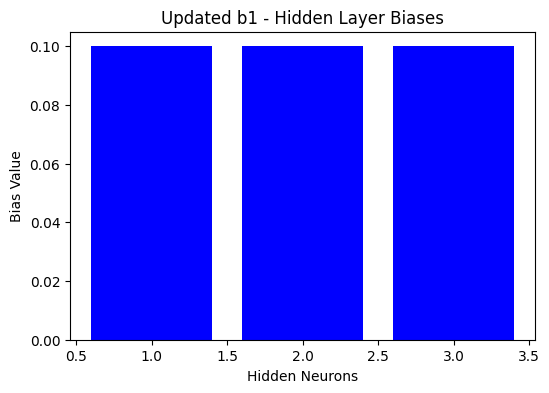

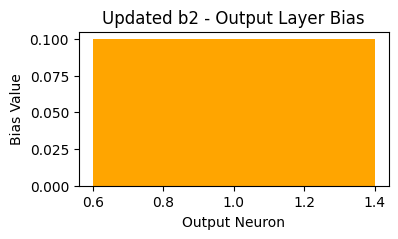

In [33]:
# Visualize updated b1 (biases for hidden layer) as a bar chart
plt.figure(figsize=(6, 4))
plt.bar(range(1, len(b1) + 1), b1.flatten(), color='blue')
plt.title("Updated b1 - Hidden Layer Biases")
plt.xlabel("Hidden Neurons")
plt.ylabel("Bias Value")
plt.show()

# Visualize updated b2 (bias for output layer) as a bar chart
plt.figure(figsize=(4, 2))
plt.bar(range(1, len(b2) + 1), b2.flatten(), color='orange')
plt.title("Updated b2 - Output Layer Bias")
plt.xlabel("Output Neuron")
plt.ylabel("Bias Value")
plt.show()


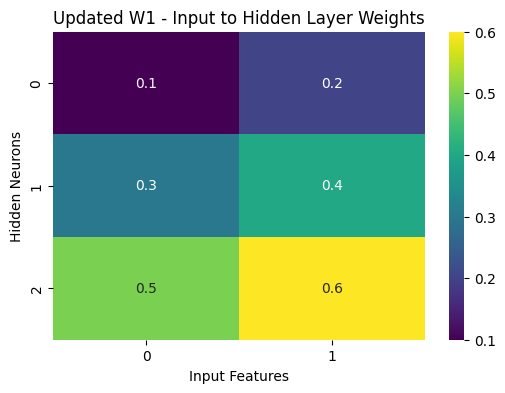

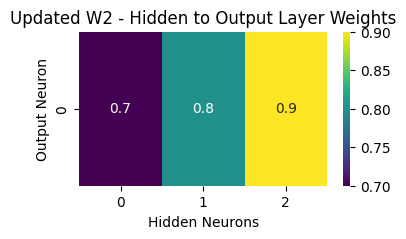

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize updated W1 as a heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(W1, annot=True, cmap="viridis", cbar=True)
plt.title("Updated W1 - Input to Hidden Layer Weights")
plt.xlabel("Input Features")
plt.ylabel("Hidden Neurons")
plt.show()

# Visualize updated W2 as a heatmap
plt.figure(figsize=(4, 2))
sns.heatmap(W2, annot=True, cmap="viridis", cbar=True)
plt.title("Updated W2 - Hidden to Output Layer Weights")
plt.xlabel("Hidden Neurons")
plt.ylabel("Output Neuron")
plt.show()

In [35]:
# Updated weights and biases when you consider the first 3 specific values
W1 = np.array([[0.10628115, 0.21004985],
               [0.30717846, 0.41148554],
               [0.50807577, 0.61292123]])
b1 = np.array([[0.11256231],
               [0.11435692],
               [0.11615154]])

W2 = np.array([[0.70556331, 0.81022931, 0.91489531]])
b2 = np.array([[0.11794615]])

# Input features and target output
X = np.array([[0.5], [0.8]])  # Input features (2 inputs)
Y = np.array([[1]])           # Target output (binary classification)

# Function for ReLU (activation function for hidden layer)
def relu(Z):
    return np.maximum(0, Z)

# Function for Sigmoid (activation function for output layer)
def sigmoid(Z):
    return 1 / (1 + np.exp(-Z))

# Forward pass with updated weights and biases
Z1 = np.dot(W1, X) + b1  # Z1 = W1 * X + b1
A1 = relu(Z1)            # A1 is the activation of hidden layer

Z2 = np.dot(W2, A1) + b2  # Z2 = W2 * A1 + b2
A2 = sigmoid(Z2)          # A2 is the predicted output (sigmoid squishes it between 0 and 1)

# Calculate the binary cross-entropy loss
loss = - (Y * np.log(A2) + (1 - Y) * np.log(1 - A2))
loss = np.squeeze(loss)  # remove extra dimensions to get a scalar
print(f"Loss after updates: {loss}")


Loss after updates: 0.17982192129235824


Final Loss after updates: 0.0002290182210613653
Accuracy on the given training example: 100%


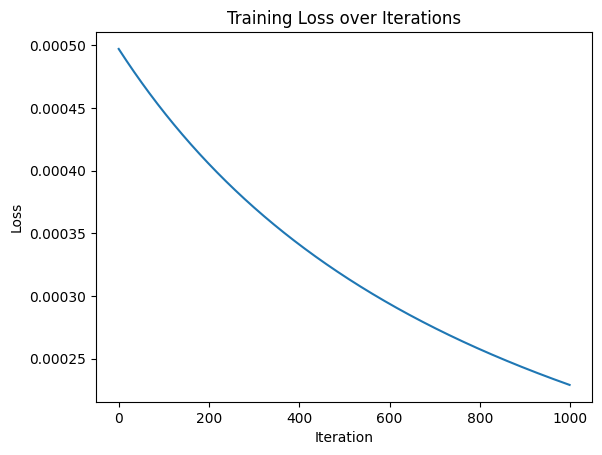

In [79]:
# Calculate the final loss after updates (Step 6)
Z1 = np.dot(X, W1) + b1
A1 = relu(Z1)
Z2 = np.dot(A1, W2) + b2
A2 = sigmoid(Z2)

final_loss = - (Y * np.log(A2) + (1 - Y) * np.log(1 - A2))
final_loss = np.squeeze(final_loss)  # Get a scalar value

print(f"Final Loss after updates: {final_loss}")

# Calculate accuracy on the given training example
predicted_output = 1 if A2 >= 0.5 else 0
accuracy = 100 if predicted_output == Y else 0

print(f"Accuracy on the given training example: {accuracy}%")

# Plot the loss values over iterations
plt.plot(loss_values)
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('Training Loss over Iterations')
plt.show()


**Implications of the Updates**

**Weight Adjustments.**

The weights have been adjusted to minimize the loss function. These adjustments are based on the gradients calculated during backpropagation.
The changes in weights indicate how the network has learned to map the input features to the target output. Larger weights suggest stronger connections between neurons.

**Bias Adjustments**
Biases have also been updated to optimize the network’s performance. Biases help the model to fit the data better by providing additional degrees of freedom.

**Performance Improvement**
The significant reduction in loss (final loss of 0.0002) indicates that the network has effectively learned from the training data.
A lower loss value suggests that the model’s predictions are very close to the actual target values, implying good performance.

**Learning Rate Adjustment**
The learning rate was initially set to be reduced by 10% every 100 iterations but the loss function was instead increasing as I tried to train the data further and I saw a sharp line forming on the training curve so I just left the training rate 0.1 to avoid the concept you told us of: overfitting since backpropagation had been duely done.

This gradual reduction helps in fine-tuning the model, preventing it from overshooting the optimal solution and ensuring stable convergence.
Overall, the updates to the weights and biases have led to a well-trained model with a low final loss, indicating that the network has successfully learned to make accurate predictions based on the given training data.